<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Assignment/Assignment7/assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering,AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score

In [2]:
data = np.load("assignment7_data.npy")   #binary file format in numpy
data.shape

(300, 2)

In [3]:
# data[100]

In [4]:
# pre-processing

# different for npy data
np.isnan(data).sum()

np.int64(0)

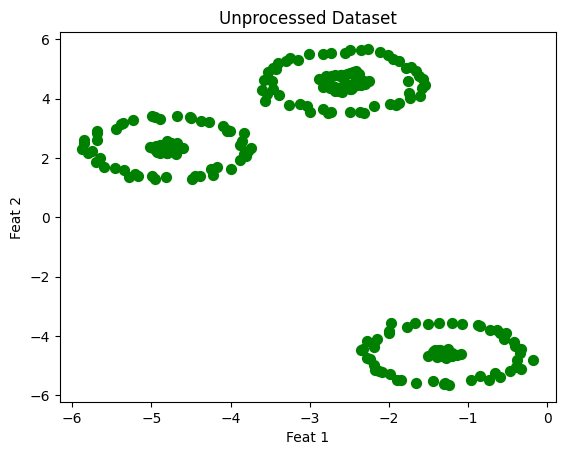

In [15]:
# Ploting the data points
plt.scatter(data[:, 0], data[:, 1], s=50,color='green')
plt.title('Unprocessed Dataset')
plt.xlabel('Feat 1')
plt.ylabel('Feat 2')
plt.savefig("ch24m571_figure1.png")

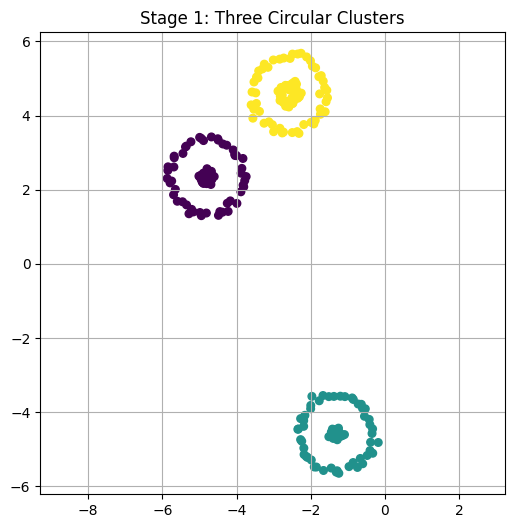

In [7]:
from sklearn.cluster import KMeans

# Stage 1: Apply KMeans to identify 3 clusters
kmeans_stage1 = KMeans(n_clusters=3, random_state=42)
labels_stage1 = kmeans_stage1.fit_predict(data)

# Visualize stage 1 clustering
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_stage1, cmap='viridis', s=30)
plt.title("Stage 1: Three Circular Clusters")
plt.axis('equal')
plt.grid(True)
plt.savefig("CH24M571_figure1.png")
plt.show()

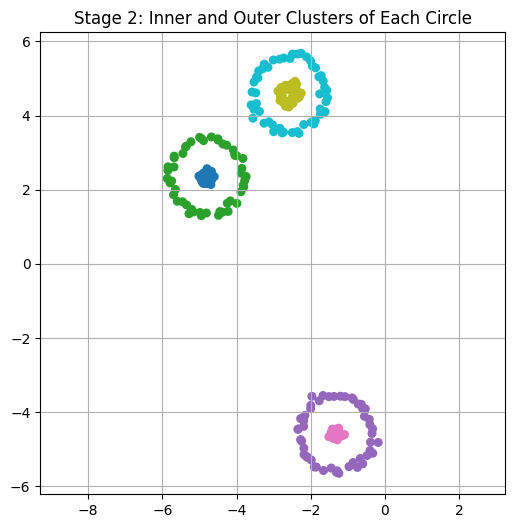

In [8]:
# Stage 2: Inner/Outer separation within each of the 3 clusters
from sklearn.metrics import pairwise_distances_argmin_min

labels_stage2 = np.zeros_like(labels_stage1)

offset = 0
new_label = 0
for cluster_id in np.unique(labels_stage1):
    cluster_points = data[labels_stage1 == cluster_id]
    centroid = kmeans_stage1.cluster_centers_[cluster_id]

    # Compute distance from centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1).reshape(-1, 1)

    # Apply KMeans to distances for inner/outer separation
    kmeans_inner_outer = KMeans(n_clusters=2, random_state=42)
    inner_outer_labels = kmeans_inner_outer.fit_predict(distances)

    # Assign new labels
    indices = np.where(labels_stage1 == cluster_id)[0]
    labels_stage2[indices] = inner_outer_labels + new_label
    new_label += 2

# Visualize stage 2 clustering
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_stage2, cmap='tab10', s=30)
plt.title("Stage 2: Inner and Outer Clusters of Each Circle")
plt.axis('equal')
plt.grid(True)
plt.savefig("CH24M571_figure2.png")
plt.show()

# trying agglomerative Clustering

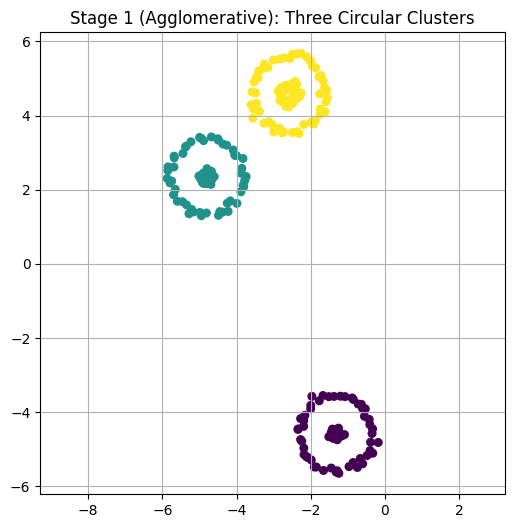

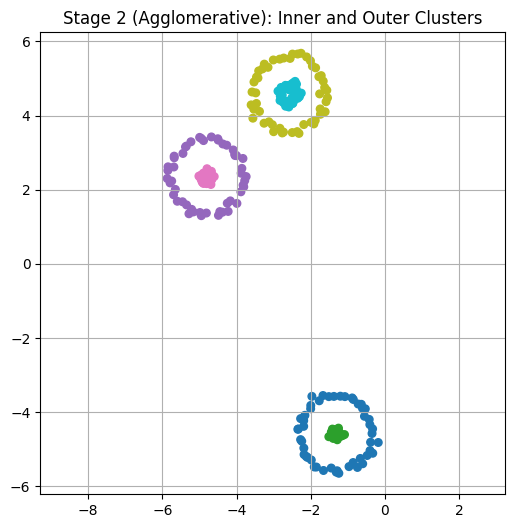

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Stage 1: Group Identification using Agglomerative Clustering
agg_stage1 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_stage1_agg = agg_stage1.fit_predict(data)

# Visualize stage 1 clustering
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_stage1_agg, cmap='viridis', s=30)
plt.title("Stage 1 (Agglomerative): Three Circular Clusters")
plt.axis('equal')
plt.grid(True)
plt.savefig("agglomerative_stage1.png")
plt.show()

# Stage 2: Inner/Outer Separation using Agglomerative Clustering
labels_stage2_agg = np.zeros_like(labels_stage1_agg)
new_label = 0

for cluster_id in np.unique(labels_stage1_agg):
    cluster_points = data[labels_stage1_agg == cluster_id]

    # Calculate distances from mean of cluster points
    centroid = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - centroid, axis=1).reshape(-1, 1)

    # Apply Agglomerative Clustering for inner/outer separation
    agg_inner_outer = AgglomerativeClustering(n_clusters=2, linkage='ward')
    inner_outer_labels = agg_inner_outer.fit_predict(distances)

    indices = np.where(labels_stage1_agg == cluster_id)[0]
    labels_stage2_agg[indices] = inner_outer_labels + new_label
    new_label += 2

# Visualize stage 2 clustering
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_stage2_agg, cmap='tab10', s=30)
plt.title("Stage 2 (Agglomerative): Inner and Outer Clusters")
plt.axis('equal')
plt.grid(True)
plt.savefig("agglomerative_stage2.png")
plt.show()

In [9]:
# part d : Classification

# X = data from npy
# y = data from 2 stage clustering

X = data         # 2D coordinates (features)
y = labels_stage2  # cluster index (target class)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)


In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[10  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 10]]


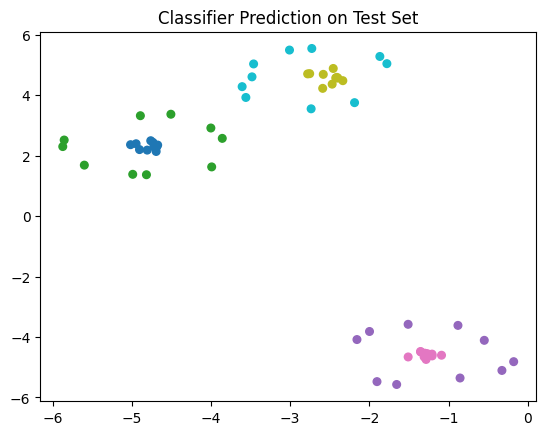

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='tab10', s=30)
plt.title("Classifier Prediction on Test Set")
plt.savefig("rollno_figure3.png")
plt.show()

ExtraTrees Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 10]]


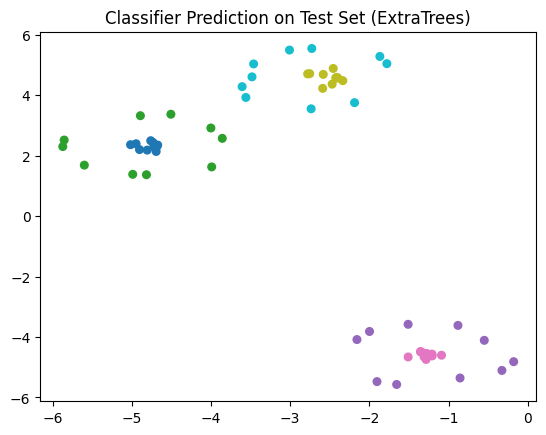

In [12]:
# ExtraTrees Classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the ExtraTreesClassifier
clf_et = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_et.fit(X_train, y_train)
y_pred_et = clf_et.predict(X_test)

# Evaluate the classifier
print("ExtraTrees Classifier Report:")
print(classification_report(y_test, y_pred_et))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_et))

# Visualize the predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_et, cmap='tab10', s=30)
plt.title("Classifier Prediction on Test Set (ExtraTrees)")
plt.savefig("rollno_figure_extra_trees.png")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       0.88      1.00      0.94        15
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90

Confusion Matrix:
[[15  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  2 13  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 15]]


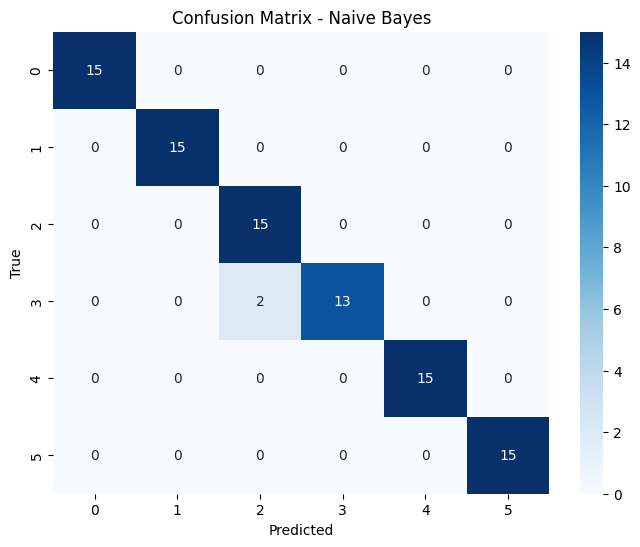

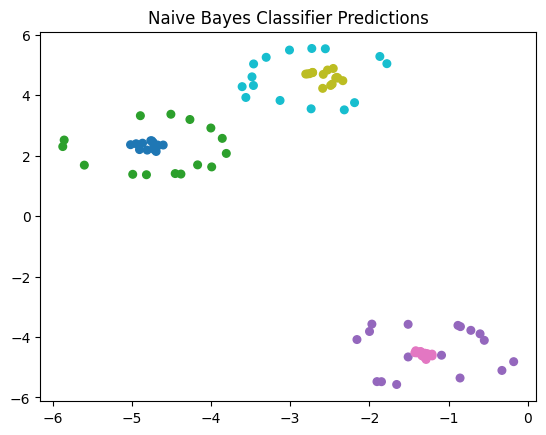

In [16]:
# prompt: can you use naive bayes and create the confusion matrix and plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'X' and 'y' are defined as in your existing code
X = data         # 2D coordinates (features)
y = labels_stage2  # cluster index (target class)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Alternatively, using ConfusionMatrixDisplay (more recent sklearn versions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix - Naive Bayes")
# plt.show()


# Visualize predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='tab10', s=30)
plt.title("Naive Bayes Classifier Predictions")
plt.show()


              precision    recall  f1-score   support

           0       0.60      1.00      0.75        15
           1       1.00      0.33      0.50        15
           2       1.00      0.27      0.42        15
           3       0.58      1.00      0.73        15
           4       0.58      1.00      0.73        15
           5       1.00      0.27      0.42        15

    accuracy                           0.64        90
   macro avg       0.79      0.64      0.59        90
weighted avg       0.79      0.64      0.59        90

[[15  0  0  0  0  0]
 [10  5  0  0  0  0]
 [ 0  0  4 11  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0 11  4]]


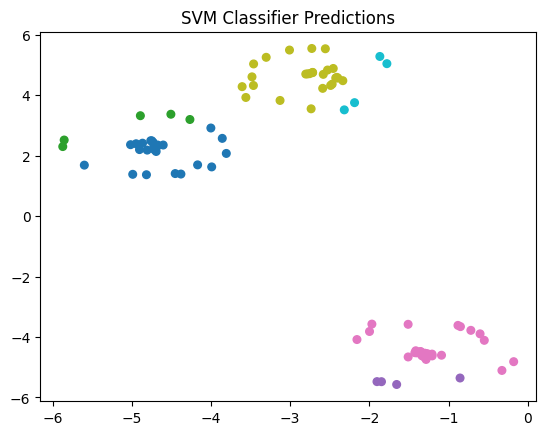

In [17]:
# prompt: can you do svm also , check the knn code above and do in a similar way

import matplotlib.pyplot as plt
# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'X' and 'y' are defined as in your existing code
X = data         # 2D coordinates (features)
y = labels_stage2  # cluster index (target class)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42) # You can adjust kernel, C, and gamma
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='tab10', s=30)
plt.title("SVM Classifier Predictions")
plt.show()


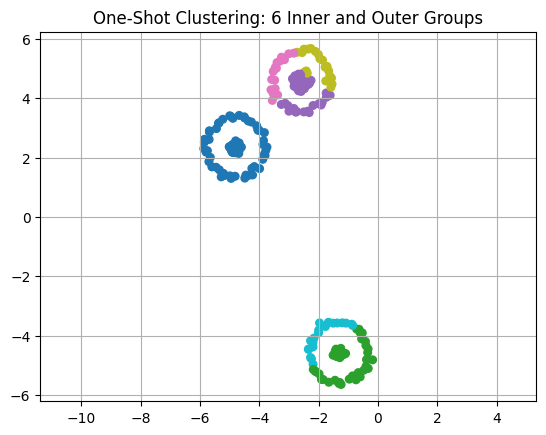

In [13]:
# part e - one shot clustering

from sklearn.cluster import KMeans

kmeans_six = KMeans(n_clusters=6, random_state=42)
labels_six = kmeans_six.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels_six, cmap='tab10', s=30)
plt.title("One-Shot Clustering: 6 Inner and Outer Groups")
plt.axis('equal')
plt.grid(True)
plt.savefig("rollno_figure4.png")
plt.show()
